<a href="https://colab.research.google.com/github/mickeykim70/keras_study/blob/main/4_1_IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification Model - Movie Review

## 4.1 Loading IMDB dataset

In [1]:
import keras
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
print(train_data.shape)
print(train_labels.shape)
print(test_data.shape)
print(test_labels.shape)

(25000,)
(25000,)
(25000,)
(25000,)


## 4.2 Multi-hot encoding

In [4]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

In [5]:
train = vectorize_sequences(train_data)
test = vectorize_sequences(test_data)
print("train shape:", train.shape)
print("test shape:", test.shape)

train shape: (25000, 10000)
test shape: (25000, 10000)


In [6]:
label_train = np.asarray(train_labels).astype('float32')
label_test = np.asarray(test_labels).astype('float32')
print("label_train shape:", label_train.shape)
print("label_test shape:", label_test.shape)

label_train shape: (25000,)
label_test shape: (25000,)


## 4.4 Building your model

In [7]:
import keras
from keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1)
])

## 4.5 Compiling the model

In [8]:
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

## 4.6 검증세트 만들기

In [9]:
validation_set = train[:10000]
training_set = train[10000:]
validation_label = label_train[:10000]
training_label = label_train[10000:]

## 4.7 Training model

In [10]:
history = model.fit(
    training_set,
    training_label,
    epochs=20,
    batch_size=512,
    validation_data=(validation_set, validation_label),
)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 72ms/step - accuracy: 0.6232 - loss: 0.2577 - val_accuracy: 0.8504 - val_loss: 0.1223
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.8768 - loss: 0.1085 - val_accuracy: 0.8577 - val_loss: 0.1119
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9067 - loss: 0.0856 - val_accuracy: 0.8852 - val_loss: 0.1024
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9360 - loss: 0.0677 - val_accuracy: 0.8688 - val_loss: 0.1029
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9470 - loss: 0.0583 - val_accuracy: 0.8546 - val_loss: 0.1109
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9588 - loss: 0.0481 - val_accuracy: 0.8831 - val_loss: 0.0979
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9682 - loss: 0.0394 - val_accuracy: 0.8821 - val_loss: 0.0987
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.9779 - loss: 0.0321 - val_accuracy: 0.8720 - v

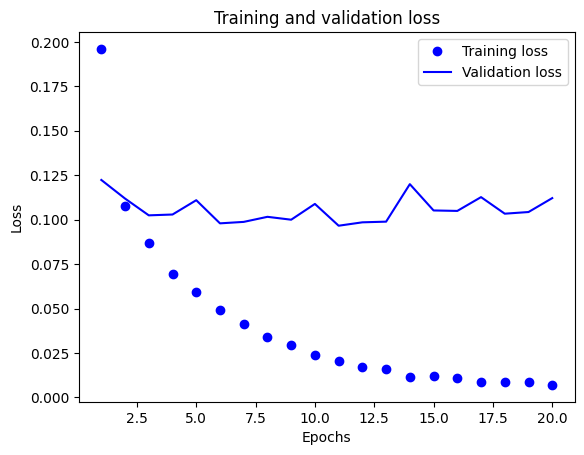

In [11]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

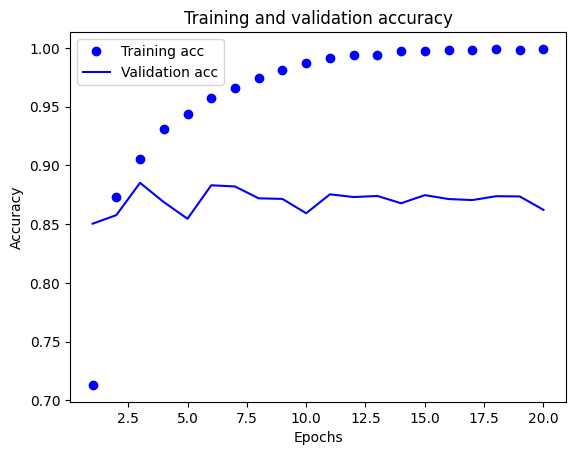

In [12]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()